In [54]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd 
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [55]:
df=pd.read_csv('Full_feature_data16sec_15_feature.csv')

df

,0,1,2,3,4,5,6,7,8,9,...,9.14,10.14,11.14,12.14,13.14,14.14,15.14,16.14,17.14,9216
0,0.335164,0.422834,0.425434,0.386857,0.268384,0.364790,0.372324,0.337670,0.317918,0.323084,...,0.547509,0.428001,0.381886,0.538637,0.495738,0.543177,0.453424,0.320640,1.318853,0.0
1,0.558940,0.547185,0.536815,0.439565,0.635416,0.497883,0.601128,0.535507,0.491099,0.487306,...,1.198504,1.258176,1.284958,1.187919,1.312455,1.242558,1.224121,1.272901,1.324214,0.0
2,0.481070,0.521079,0.499746,0.613020,0.501244,0.668536,0.593137,0.620548,0.625243,0.594081,...,1.187891,1.316769,1.341679,1.294233,1.312466,1.173382,1.296258,1.354735,1.374708,0.0
3,0.648244,0.654992,0.654824,0.651539,0.498437,0.690035,0.509310,0.669250,0.483494,0.501346,...,0.837796,0.424594,0.528106,0.817291,0.404327,0.634072,0.440675,0.732804,1.354924,1.0
4,0.273979,0.277746,0.284761,0.281482,0.303147,0.285764,0.280198,0.274268,0.269927,0.271021,...,0.690006,0.812859,0.717739,0.951507,0.772926,0.886945,0.730272,0.576406,1.311020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19369,0.420159,0.539634,0.553114,0.445364,0.456413,0.484084,0.491127,0.502279,0.405376,0.530856,...,1.272673,1.261968,1.310505,1.349567,1.252342,1.353315,1.225385,1.336892,1.304636,0.0
19370,0.481627,0.467439,0.593716,0.594382,0.465957,0.529134,0.553749,0.482576,0.462229,0.442401,...,1.268374,1.322265,1.341143,1.346202,1.294336,1.359204,1.328350,1.340989,1.352717,0.0
19371,0.623665,0.564269,0.519484,0.492092,0.561203,0.471161,0.608575,0.581709,0.579173,0.511012,...,1.299334,1.309861,1.358664,1.271001,1.388717,1.361720,1.295100,1.296166,1.350382,0.0
19372,0.548308,0.526311,0.558804,0.603206,0.437835,0.499259,0.615961,0.377607,0.531348,0.441672,...,1.347398,1.200716,1.251561,1.318744,1.269002,1.226858,1.221599,1.275983,1.329643,0.0


In [56]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(how='all')

df.reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,9.14,10.14,11.14,12.14,13.14,14.14,15.14,16.14,17.14,9216
0,0.335164,0.422834,0.425434,0.386857,0.268384,0.364790,0.372324,0.337670,0.317918,0.323084,...,0.547509,0.428001,0.381886,0.538637,0.495738,0.543177,0.453424,0.320640,1.318853,0.0
1,0.558940,0.547185,0.536815,0.439565,0.635416,0.497883,0.601128,0.535507,0.491099,0.487306,...,1.198504,1.258176,1.284958,1.187919,1.312455,1.242558,1.224121,1.272901,1.324214,0.0
2,0.481070,0.521079,0.499746,0.613020,0.501244,0.668536,0.593137,0.620548,0.625243,0.594081,...,1.187891,1.316769,1.341679,1.294233,1.312466,1.173382,1.296258,1.354735,1.374708,0.0
3,0.648244,0.654992,0.654824,0.651539,0.498437,0.690035,0.509310,0.669250,0.483494,0.501346,...,0.837796,0.424594,0.528106,0.817291,0.404327,0.634072,0.440675,0.732804,1.354924,1.0
4,0.273979,0.277746,0.284761,0.281482,0.303147,0.285764,0.280198,0.274268,0.269927,0.271021,...,0.690006,0.812859,0.717739,0.951507,0.772926,0.886945,0.730272,0.576406,1.311020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19369,0.420159,0.539634,0.553114,0.445364,0.456413,0.484084,0.491127,0.502279,0.405376,0.530856,...,1.272673,1.261968,1.310505,1.349567,1.252342,1.353315,1.225385,1.336892,1.304636,0.0
19370,0.481627,0.467439,0.593716,0.594382,0.465957,0.529134,0.553749,0.482576,0.462229,0.442401,...,1.268374,1.322265,1.341143,1.346202,1.294336,1.359204,1.328350,1.340989,1.352717,0.0
19371,0.623665,0.564269,0.519484,0.492092,0.561203,0.471161,0.608575,0.581709,0.579173,0.511012,...,1.299334,1.309861,1.358664,1.271001,1.388717,1.361720,1.295100,1.296166,1.350382,0.0
19372,0.548308,0.526311,0.558804,0.603206,0.437835,0.499259,0.615961,0.377607,0.531348,0.441672,...,1.347398,1.200716,1.251561,1.318744,1.269002,1.226858,1.221599,1.275983,1.329643,0.0


In [57]:
updated_df = df.dropna(axis=0)

In [58]:
X=updated_df.drop(columns=['9216'])
Y=updated_df['9216']

In [60]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, Y)

In [61]:
x_train,x_test,y_train,y_test= train_test_split(X_res,y_res,test_size=0.3,random_state=20,stratify=y_res)

In [63]:
y_train.value_counts()

0.0    12687
1.0    12686
Name: 9216, dtype: int64

In [64]:
rf=RandomForestClassifier()
xgb=xgb.XGBClassifier()
dt=DecisionTreeClassifier()
gb=GradientBoostingClassifier()

In [65]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [67]:
pred_rf=rf.predict(x_test)
pred_xgb=xgb.predict(x_test)


In [68]:

print(accuracy_score(y_test,pred_xgb))

0.9625747126436781


In [69]:
print('',classification_report(y_test,pred_xgb))

               precision    recall  f1-score   support

         0.0       0.99      0.94      0.96      5437
         1.0       0.94      0.99      0.96      5438

    accuracy                           0.96     10875
   macro avg       0.96      0.96      0.96     10875
weighted avg       0.96      0.96      0.96     10875



In [70]:
cohen_kappa_score(y_test,pred_xgb)

0.9251490740249847

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y_test, pred_xgb)

array([[5095,  342],
       [  65, 5373]], dtype=int64)

C:\Users\dodul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


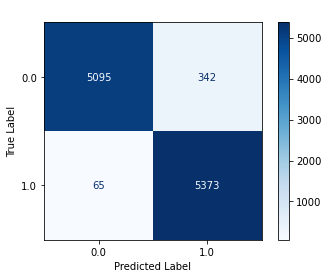

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(xgb, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color='Black')
plt.ylabel('True Label', color='Black')
plt.gcf().axes[0].tick_params(colors='Black')
plt.gcf().axes[1].tick_params(colors='Black')
plt.show()